**01. Data Preprocessing**

1.1. Importing Libraries



In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2. Importing dataset

In [29]:
dataset = pd.read_csv('Salary_Data.csv')
# Independent Variables
x = dataset.iloc[:,:-1].values
#Dependent Variables
y = dataset.iloc[:,-1].values

1.3. Taking care of missing data

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:,0:1])
x[:,0:1] = imputer.transform(x[:,0:1])
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


1.4 Encoding the categorical data

We need to do these to convert our srings to numerical values so that our machine cam work upon

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 7)	1.0
  (9, 8)	1.0
  (10, 9)	1.0
  (11, 10)	1.0
  (12, 10)	1.0
  (13, 11)	1.0
  (14, 12)	1.0
  (15, 13)	1.0
  (16, 14)	1.0
  (17, 15)	1.0
  (18, 16)	1.0
  (19, 17)	1.0
  (20, 18)	1.0
  (21, 19)	1.0
  (22, 20)	1.0
  (23, 21)	1.0
  (24, 22)	1.0
  (25, 23)	1.0
  (26, 24)	1.0
  (27, 25)	1.0
  (28, 26)	1.0
  (29, 27)	1.0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
print(y)

[ 1  4  0  3  2  7 11  5 14 10 13  6  8  9 12 16 15 18 17 20 19 21 22 26
 24 23 27 25 29 28]


1.5 Splitting into training set and test set

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [52]:
print(x_train)
print(x_test)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [53]:
print(y_train)
print(y_test)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


Training Simple Linear Regression model


In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Predicting test results 

In [55]:
y_test1=regressor.predict(x_test)
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431.]


Visualizing Training results

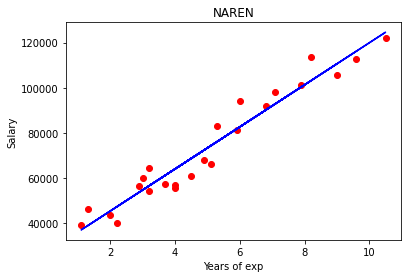

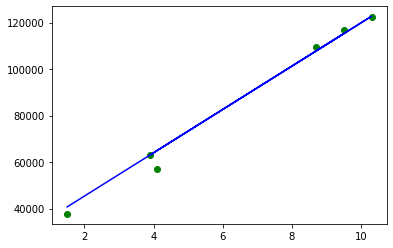

[ 37731. 122391.  57081.  63218. 116969. 109431.]
[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [59]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('NAREN')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_test1,color='blue')
plt.show()
print(y_test)
print(y_test1)